In [73]:
import pandas as pd
from config import data_raw_dir
from os.path import join
from datetime import datetime


In [74]:
# load dataset
data = pd.read_csv(join(data_raw_dir, 'condicionamentos_transito.csv'),index_col='_id')
data.columns

Index(['tipo_de_condicionamento', 'troco', 'motivo', 'data_de_inicio',
       'data_de_fim', 'observacoes', 'data_de_registo', 'latitude',
       'longitude', 'objectid', 'esriGeometryPolygon'],
      dtype='object')

In [75]:
data.dropna(inplace=True)

In [76]:
data.head(5)

,tipo_de_condicionamento,troco,motivo,data_de_inicio,data_de_fim,observacoes,data_de_registo,latitude,longitude,objectid,esriGeometryPolygon
_id,,,,,,,,,,,
1,Alteração de sentidos,"Largo Padre Inácio Gomes, arruamento sul e Rua...",Obras públicas,1.606090e+12,1.614557e+12,Prorrogação até 1/03/2021,1.614557e+12,41.17461,-8.633145,13575,"[[[-41985.44000000026, 167493.75999999972], [-..."
2,Corte total,entre a Rua Faria Guimaraes e a Rua Moreira da...,Obras particulares,1.599782e+12,1.599869e+12,Das 21H00 do dia 11/09 às 07H00 do dia 12/09,1.599696e+12,41.15663,-8.609079,13576,"[[[-39949.052500000245, 165467.15019999963], [..."
5,Alteração de sentidos,No troço compreendido entre a Rua do Monte dos...,Obras públicas,1.606090e+12,1.614557e+12,Prorrogação até 1/03/2021,1.614557e+12,41.17705,-8.630256,13579,"[[[-41610.53699999953, 167771.72599999994], [-..."
11,Corte total,No troço compreendido entre o n.º 53 e o n.º 1...,Passagem de cabo de fibra ótica,1.614125e+12,1.614643e+12,00H00/07H00 e 21H00/24H00,1.613606e+12,41.14929,-8.587113,13590,"[[[-38029.379999999845, 164716.6300000008], [-..."
15,Estreitamento,Entre a Rua do Campo Alegre e o n.º 856,Manutenção do arvoredo,1.616544e+12,1.616717e+12,Das 9:00 às 18:00,1.615939e+12,41.15350,-8.648954,13594,"[[[-43217.95000000016, 165144.31000000023], [-..."


<Axes: xlabel='_id'>

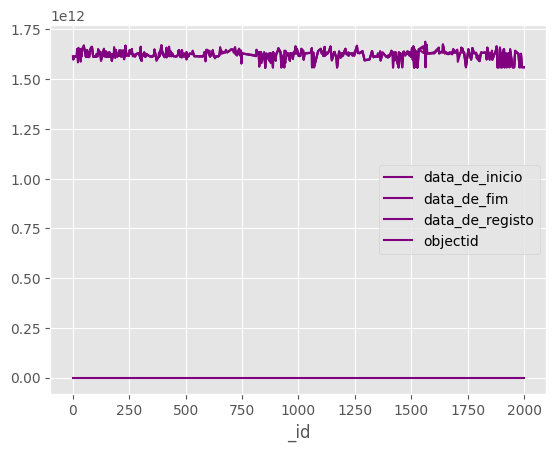

In [77]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

data.plot(color="purple")

In [78]:
data.data_de_inicio[1]

1606089600000.0

In [79]:
data.head(5)

,tipo_de_condicionamento,troco,motivo,data_de_inicio,data_de_fim,observacoes,data_de_registo,latitude,longitude,objectid,esriGeometryPolygon
_id,,,,,,,,,,,
1,Alteração de sentidos,"Largo Padre Inácio Gomes, arruamento sul e Rua...",Obras públicas,1.606090e+12,1.614557e+12,Prorrogação até 1/03/2021,1.614557e+12,41.17461,-8.633145,13575,"[[[-41985.44000000026, 167493.75999999972], [-..."
2,Corte total,entre a Rua Faria Guimaraes e a Rua Moreira da...,Obras particulares,1.599782e+12,1.599869e+12,Das 21H00 do dia 11/09 às 07H00 do dia 12/09,1.599696e+12,41.15663,-8.609079,13576,"[[[-39949.052500000245, 165467.15019999963], [..."
5,Alteração de sentidos,No troço compreendido entre a Rua do Monte dos...,Obras públicas,1.606090e+12,1.614557e+12,Prorrogação até 1/03/2021,1.614557e+12,41.17705,-8.630256,13579,"[[[-41610.53699999953, 167771.72599999994], [-..."
11,Corte total,No troço compreendido entre o n.º 53 e o n.º 1...,Passagem de cabo de fibra ótica,1.614125e+12,1.614643e+12,00H00/07H00 e 21H00/24H00,1.613606e+12,41.14929,-8.587113,13590,"[[[-38029.379999999845, 164716.6300000008], [-..."
15,Estreitamento,Entre a Rua do Campo Alegre e o n.º 856,Manutenção do arvoredo,1.616544e+12,1.616717e+12,Das 9:00 às 18:00,1.615939e+12,41.15350,-8.648954,13594,"[[[-43217.95000000016, 165144.31000000023], [-..."


In [80]:
timestamp_cols = ["data_de_inicio", "data_de_fim", "data_de_registo"]
for col in timestamp_cols:
    data[col] = pd.to_datetime(data[col], unit='ms')

In [81]:
data['elapsed_time'] = data['data_de_fim'] - data['data_de_inicio']

In [82]:
data.sort_values(by='elapsed_time', ascending=False).head(20)

,tipo_de_condicionamento,troco,motivo,data_de_inicio,data_de_fim,observacoes,data_de_registo,latitude,longitude,objectid,esriGeometryPolygon,elapsed_time
_id,,,,,,,,,,,,
1562,Estacionamento,baia de estacionamento junto à Travessa do Bon...,Bombagem de betão,2021-07-30 23:00:00,2023-07-08 23:00:00,10H00/16H00,2022-01-19 00:00:00,41.14811,-8.609492,15179,"[[[-39917.75569999971, 164533.9947999991], [-3...",708 days 00:00:00
35,Estacionamento,entre o nº 52 e o nº 68,Obras particulares,2020-04-30 00:00:00,2022-02-09 00:00:00,Prorrogação até 12/11/2021,2021-11-26 00:00:00,41.14290,-8.611082,13615,"[[[-40051.73720000028, 163946.27009999994], [-...",650 days 00:00:00
415,Estacionamento,"nº 24, lado norte e numa extensão de aproximad...",Obras particulares,2020-12-27 00:00:00,2022-07-29 23:00:00,Prorrogação até 25/12/2021,2022-01-26 00:00:00,41.14800,-8.633153,14009,"[[[-41840.34559999961, 164500.2961999994], [-4...",579 days 23:00:00
504,Estacionamento,entre o nº 90 e 94,Cargas e descargas,2020-08-28 00:00:00,2021-11-24 00:00:00,"Prorrogação até 24/11/2021, das 10:00 às 16:00",2021-09-02 23:00:00,41.14171,-8.616126,14116,"[[[-40472.628999999695, 163825.98570000048], [...",453 days 00:00:00
299,Estacionamento,no troço compreendido entre o nº 13 e o nº 21,Obras particulares,2020-10-13 00:00:00,2021-12-26 00:00:00,Das 10H00 às 16H00. Prorrogação até 29/06/2021,2021-03-04 00:00:00,41.14558,-8.621201,13891,"[[[-40897.723799999854, 164249.48619999894], [...",439 days 00:00:00
1706,Estacionamento,no troço compreendido entre o n.º 257 e o n.º ...,Obras particulares,2020-04-23 00:00:00,2021-06-16 00:00:00,Prorrogação até 16/06/2021,2021-02-24 00:00:00,41.14402,-8.615908,15328,"[[[-40455.80510000051, 164078.98750000016], [-...",419 days 00:00:00
1553,Estacionamento,entre o nº 167 e o nº 171,Cargas e descargas,2021-09-23 23:00:00,2022-10-19 23:00:00,10H00/16H00,2022-07-13 23:00:00,41.15284,-8.676863,15170,"[[[-45564.24490000029, 165086.36950000064], [-...",391 days 00:00:00
183,Estacionamento,Junto ao n.º 224 e numa extensão de aproximada...,Cargas e descargas,2021-08-08 23:00:00,2022-08-25 23:00:00,Das 10:00 às 16:00,2021-08-15 23:00:00,41.14509,-8.611039,13765,"[[[-40047.49629999969, 164196.79830000008], [-...",382 days 00:00:00
588,Estacionamento,"junto ao nº 788, numa extensão de 11,00 metros",Obras particulares,2020-05-15 00:00:00,2021-04-24 00:00:00,Prorrogação até 24/04/2021,2021-01-28 00:00:00,41.16364,-8.631822,14187,"[[[-41783.54519999947, 166264.7039000007], [-4...",344 days 00:00:00


Timestamps do not make sense! They do not match "observacoes". Recording mistake.
